In [2]:
# ===============================
# Data Cleaning, Integration, and Dynamic Pricing
# Vaishali_Magar
# ===============================

# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [3]:
# -------------------------------
# Step 1: Load Raw Data
# -------------------------------
df1 = pd.read_csv(r"C:\Users\Vaishali Magar\Pictures\Classes April-May 2018.csv")
df2 = pd.read_csv(r"C:\Users\Vaishali Magar\Pictures\Classes June 2018.csv")

print("Shape April-May:", df1.shape)
print("Shape June:", df2.shape)
print("\n--- April-May Sample ---")
print(df1.head(3))
print("\n--- June Sample ---")
print(df2.head(3))

Shape April-May: (2177, 7)
Shape June: (1112, 7)

--- April-May Sample ---
  ActivitySiteID      ActivityDescription  \
0            HXP  20-20-20  2.45pm-3.45pm   
1            HXP  20-20-20  2.45pm-3.45pm   
2            HXP  20-20-20  2.45pm-3.45pm   

  BookingEndDateTime (Month / Day / Year) BookingStartTime  MaxBookees  \
0                               08-Apr-18         14:45:00          25   
1                               15-Apr-18         14:45:00          25   
2                               22-Apr-18         14:45:00          25   

   Number Booked  Price (INR)  
0             12        499.0  
1             15        499.0  
2             14        499.0  

--- June Sample ---
  ActivitySiteID     ActivityDescription  \
0            BRP  20:20:20  9.30-10.30am   
1            BRP  20:20:20  9.30-10.30am   
2            BRP  20:20:20  9.30-10.30am   

  BookingEndDateTime (Month / Day / Year) BookingStartTime  MaxBookees  \
0                               01-Jun-18      

In [4]:

# -------------------------------
# Step 2: Clean Data
# -------------------------------

# Standardize column names
def clean_columns(df):
    df.columns = (
        df.columns.str.strip()
        .str.replace(" ", "_")
        .str.replace("(", "")
        .str.replace(")", "")
        .str.replace("/", "_")
    )
    return df

df1 = clean_columns(df1)
df2 = clean_columns(df2)

# Merge datasets
df = pd.concat([df1, df2], ignore_index=True)
print("\n✅ After merging: ", df.shape)

# Handle missing values
print("\nMissing values before handling:\n", df.isna().sum())
df = df.fillna({"Number_Booked": 0, "Price_INR": df["Price_INR"].median()})
df = df.dropna(how="all")
print("\nMissing values after handling:\n", df.isna().sum())

# Remove duplicates
print("\nDuplicates before:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates after:", df.duplicated().sum())

# Correct data types
df["Price_INR"] = pd.to_numeric(df["Price_INR"], errors="coerce")
df["Number_Booked"] = pd.to_numeric(df["Number_Booked"], errors="coerce")
df["MaxBookees"] = pd.to_numeric(df["MaxBookees"], errors="coerce")

# Convert date column to datetime with explicit format
df["BookingEndDateTime"] = pd.to_datetime(
    df["BookingEndDateTime_Month___Day___Year"], 
    format="%d-%b-%y",
    errors="coerce"
)

# Drop old messy column
df = df.drop(columns=["BookingEndDateTime_Month___Day___Year"])

# Clean categorical text
df["ActivitySiteID"] = df["ActivitySiteID"].str.strip()
df["ActivityDescription"] = df["ActivityDescription"].str.strip()

print("\n--- Cleaned Data Sample ---")
print(df.head(5))
print("\nData Types:\n", df.dtypes)


✅ After merging:  (3289, 7)

Missing values before handling:
 ActivitySiteID                            0
ActivityDescription                       0
BookingEndDateTime_Month___Day___Year     0
BookingStartTime                          0
MaxBookees                                0
Number_Booked                             0
Price_INR                                18
dtype: int64

Missing values after handling:
 ActivitySiteID                           0
ActivityDescription                      0
BookingEndDateTime_Month___Day___Year    0
BookingStartTime                         0
MaxBookees                               0
Number_Booked                            0
Price_INR                                0
dtype: int64

Duplicates before: 0
Duplicates after: 0

--- Cleaned Data Sample ---
  ActivitySiteID      ActivityDescription BookingStartTime  MaxBookees  \
0            HXP  20-20-20  2.45pm-3.45pm         14:45:00          25   
1            HXP  20-20-20  2.45pm-3.45pm         

In [5]:
# -------------------------------
# Step 3: Transform Data
# -------------------------------

# Standard scaling
scaler = StandardScaler()
df[["Price_INR", "Number_Booked", "MaxBookees"]] = scaler.fit_transform(
    df[["Price_INR", "Number_Booked", "MaxBookees"]]
)

print("\n--- After Scaling ---")
print(df[["Price_INR", "Number_Booked", "MaxBookees"]].head(5))



--- After Scaling ---
   Price_INR  Number_Booked  MaxBookees
0  -1.709436      -0.535512   -0.475775
1  -1.709436      -0.219810   -0.475775
2  -1.709436      -0.325044   -0.475775
3  -1.709436      -0.851213   -0.475775
4  -1.709436      -1.061680   -0.475775


In [6]:
# -------------------------------
# Step 4: Quality Checks
# -------------------------------

# Invalid bookings
invalid_bookings = df[df["Number_Booked"] > df["MaxBookees"]]
print("\nInvalid bookings found:", invalid_bookings.shape[0])

# Summary statistics
print("\nSummary Statistics:\n", df.describe())



Invalid bookings found: 1850

Summary Statistics:
          MaxBookees  Number_Booked     Price_INR  \
count  3.289000e+03   3.289000e+03  3.289000e+03   
mean   1.901118e-16  -1.123388e-16 -8.641444e-17   
min   -1.999978e+00  -1.693083e+00 -1.709436e+00   
25%   -5.420451e-01  -7.459791e-01 -6.977698e-01   
50%   -1.444272e-01  -1.145765e-01 -4.448533e-01   
75%    1.869211e-01   7.272936e-01  8.197296e-01   
max    2.506359e+00   4.936644e+00  2.716604e+00   
std    1.000152e+00   1.000152e+00  1.000152e+00   

                  BookingEndDateTime  
count                           3289  
mean   2018-05-16 08:58:57.610215680  
min              2018-04-01 00:00:00  
25%              2018-04-24 00:00:00  
50%              2018-05-16 00:00:00  
75%              2018-06-08 00:00:00  
max              2018-06-30 00:00:00  
std                              NaN  


In [7]:
# -------------------------------
# Step 5: Dynamic Pricing Function
# -------------------------------

def dynamic_pricing(row):
    price = row["Price_INR"]

    # Demand-based pricing
    demand_ratio = row["Number_Booked"] / row["MaxBookees"]
    if demand_ratio > 0.8:
        price *= 1.2
    elif demand_ratio < 0.5:
        price *= 0.9

    # Time-based pricing (peak hours: 6–9am, 6–9pm)
    try:
        hour = pd.to_datetime(row["BookingStartTime"], format="%H:%M:%S").hour
    except:
        try:
            hour = pd.to_datetime(row["BookingStartTime"], format="%H:%M").hour
        except:
            hour = None

    if hour is not None and ((6 <= hour <= 9) or (18 <= hour <= 21)):
        price *= 1.15

    # Location-based pricing (example)
    if row["ActivitySiteID"] in ["HXP", "BRP"]:
        price *= 1.1

    return round(price, 2)

df["DynamicPrice"] = df.apply(dynamic_pricing, axis=1)

print("\n--- Data with Dynamic Pricing ---")
print(df[["ActivitySiteID", "ActivityDescription", "Price_INR", "DynamicPrice"]].head(10))



--- Data with Dynamic Pricing ---
  ActivitySiteID      ActivityDescription  Price_INR  DynamicPrice
0            HXP  20-20-20  2.45pm-3.45pm  -1.709436         -2.26
1            HXP  20-20-20  2.45pm-3.45pm  -1.709436         -1.69
2            HXP  20-20-20  2.45pm-3.45pm  -1.709436         -1.88
3            HXP  20-20-20  2.45pm-3.45pm  -1.709436         -2.26
4            HXP  20-20-20  2.45pm-3.45pm  -1.709436         -2.26
5            HXP  20-20-20  2.45pm-3.45pm  -1.709436         -2.26
6            HXP  20-20-20  2.45pm-3.45pm  -1.709436         -2.26
7            HXP  20-20-20  2.45pm-3.45pm  -1.709436         -2.26
8            TSC     20-20-20 7.00-8.00pm  -1.709436         -2.36
9            TSC     20-20-20 7.00-8.00pm  -1.709436         -2.36


In [8]:
# -------------------------------
# Step 6: Export Cleaned Data
# -------------------------------
df.to_csv("Cleaned_Classes_April_June_2018.csv", index=False)
print("\n✅ Cleaned dataset saved as Cleaned_Classes_April_June_2018.csv")



✅ Cleaned dataset saved as Cleaned_Classes_April_June_2018.csv


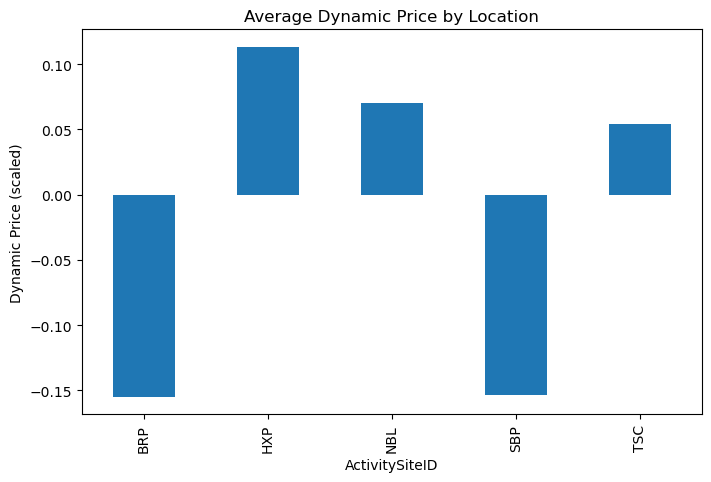

In [9]:
# -------------------------------
# Step 7: Simple Visualization
# -------------------------------
plt.figure(figsize=(8,5))
df.groupby("ActivitySiteID")["DynamicPrice"].mean().plot(kind="bar")
plt.title("Average Dynamic Price by Location")
plt.ylabel("Dynamic Price (scaled)")
plt.show()


In [10]:
# -------------------------------
# Step 4: Quality Checks + Report
# -------------------------------

# Missing values report
missing_report = df.isnull().sum()

# Duplicate rows count
duplicate_count = df.duplicated().sum()

# Invalid bookings (more booked than capacity)
invalid_bookings = df[df["Number_Booked"] > df["MaxBookees"]]

# Collect results into a DataFrame
quality_report = pd.DataFrame({
    "Metric": ["Missing Values", "Duplicates", "Invalid Bookings"],
    "Count": [missing_report.sum(), duplicate_count, invalid_bookings.shape[0]]
})

print("\n--- Quality Report ---")
print(quality_report, "\n")

# Export quality report
quality_report.to_csv("Quality_Report_Vaishali_Magar.csv", index=False)

print("📄 Quality report saved as Quality_Report_Vaishali_Magar.csv")

# Detailed statistics
summary_stats = df.describe()
summary_stats.to_csv("Summary_Statistics_Vaishali_Magar.csv")

print("📊 Summary statistics saved as Summary_Statistics_Vaishali_Magar.csv")



--- Quality Report ---
             Metric  Count
0    Missing Values      0
1        Duplicates      0
2  Invalid Bookings   1850 

📄 Quality report saved as Quality_Report_Vaishali_Magar.csv
📊 Summary statistics saved as Summary_Statistics_Vaishali_Magar.csv
